In [1]:
import numpy as np
from base import *
from Optimizers import NewtonOptimizer



In [2]:
def rosenbrock(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

def rosenbrock_grad(x):
    return np.array([-400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0]),
                     200 * (x[1] - x[0]**2)])

In [3]:
problem = OptimizationProblem(rosenbrock, rosenbrock_grad)
optimizer = NewtonOptimizer(problem, line_search_type='fixed', tol=1e-6, max_iter=100)

In [7]:
# A simple test on classic Netwon Optimizer
x0 = np.array([-1.5, 2.0])
x_star = optimizer.solve(x0)
print(f"Initialization: {x0}")
print(f"Optimization: {x_star}")
print(f"F(x_best): {rosenbrock(x_star)}")
print(f"Iterations: {optimizer.iter_info['iter']}")

Iteration 10: Problem converged!
Initialization: [-1.5  2. ]
Optimization: [1. 1.]
F(x_best): 5.7192415628523356e-30
Iterations: 10


# Task 4: Newton with exact line search (Brent)

In [8]:

problem = OptimizationProblem(rosenbrock, rosenbrock_grad)
opt_exact = NewtonOptimizer(problem, line_search_type='exact', tol=1e-6, max_iter=500)

x0 = np.array([-1.2, 1.0], dtype=float)
x_star = opt_exact.solve(x0)

print(f"Initialization: {x0}")
print(f"Optimization: {x_star}")
print(f"F(x_best): {rosenbrock(x_star)}")
print(f"Iterations: {opt_exact.iter_info['iter']}")


Iteration 14: Problem converged!
Initialization: [-1.2  1. ]
Optimization: [1. 1.]
F(x_best): 1.0161131506430819e-23
Iterations: 14


In [ ]:
# Task 5: test to veiry convergence on Rosenbrock
!pytest -q tests/test_rosenbrock.py::test_newton_exact_line_search_rosenbrock

.                                                                        [100%]
1 passed in 10.29s


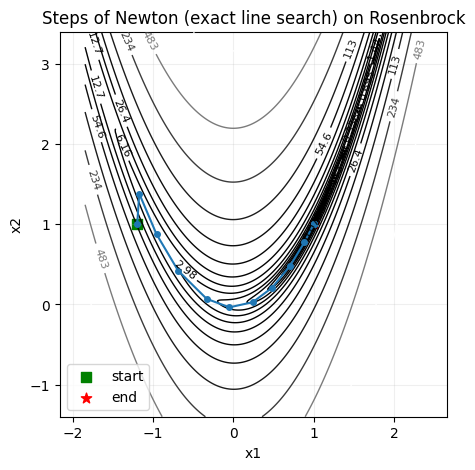

In [ ]:
# Task 5: Visualization: contour plot + iteration path (Fig.1 right style)
import numpy as np
import matplotlib.pyplot as plt

# sample area
xs = np.array(opt_exact.iter_info['x'])  # shape: (k, 2)

x_min = min(xs[:, 0].min(), -1.5)
x_max = max(xs[:, 0].max(), 2.0)
y_min = min(xs[:, 1].min(), -1.0)
y_max = max(xs[:, 1].max(), 3.0)

pad_x = 0.1 * (x_max - x_min)
pad_y = 0.1 * (y_max - y_min)

xlin = np.linspace(x_min - pad_x, x_max + pad_x, 300)
ylin = np.linspace(y_min - pad_y, y_max + pad_y, 300)
X, Y = np.meshgrid(xlin, ylin)
Z = 100.0 * (Y - X**2)**2 + (1.0 - X)**2

plt.figure(figsize=(5, 5))
# logarithmic contour lines
levels = np.logspace(-3, 3, 20)
CS = plt.contour(X, Y, Z, levels=levels, cmap='gray', linewidths=1)
plt.clabel(CS, inline=1, fontsize=8, fmt='%.3g')

# iterative trajectory
plt.plot(xs[:, 0], xs[:, 1], '-o', color='tab:blue', markersize=4, linewidth=1.5)
# start and end point
plt.scatter(xs[0, 0], xs[0, 1], c='green', s=60, marker='s', label='start')
plt.scatter(xs[-1, 0], xs[-1, 1], c='red', s=60, marker='*', label='end')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Steps of Newton (exact line search) on Rosenbrock')
plt.legend()
plt.axis('equal')
plt.grid(True, alpha=0.2)
plt.show()


In [4]:
#task 6: inexact line search
problem = OptimizationProblem(rosenbrock, rosenbrock_grad)
opt_exact = NewtonOptimizer(problem, line_search_type='inexact', tol=1e-6, max_iter=500)

x0 = np.array([-1.2, 1.0], dtype=float)
x_star = opt_exact.solve(x0)

print(f"Initialization: {x0}")
print(f"Optimization: {x_star}")
print(f"F(x_best): {rosenbrock(x_star)}")
print(f"Iterations: {opt_exact.iter_info['iter']}")


Iteration 16: Problem converged!
Initialization: [-1.2  1. ]
Optimization: [1. 1.]
F(x_best): 6.55291416982679e-22
Iterations: 16


In [5]:
# Task 7: test to veiry convergence on Rosenbrock
!pytest -q tests/test_rosenbrock.py::test_newton_inexact_line_search_rosenbrock

.                                                                        [100%]
1 passed in 0.32s


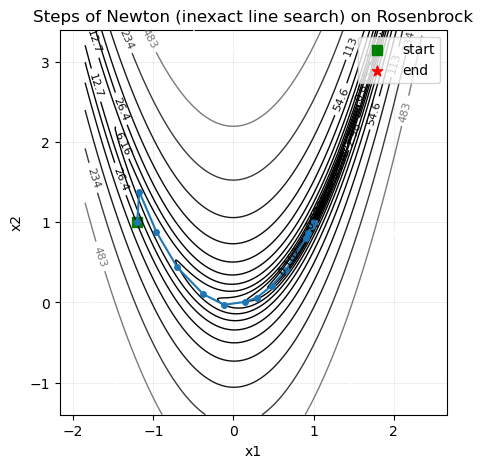

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# sample area
xs = np.array(opt_exact.iter_info['x'])  # shape: (k, 2)

x_min = min(xs[:, 0].min(), -1.5)
x_max = max(xs[:, 0].max(), 2.0)
y_min = min(xs[:, 1].min(), -1.0)
y_max = max(xs[:, 1].max(), 3.0)

pad_x = 0.1 * (x_max - x_min)
pad_y = 0.1 * (y_max - y_min)

xlin = np.linspace(x_min - pad_x, x_max + pad_x, 300)
ylin = np.linspace(y_min - pad_y, y_max + pad_y, 300)
X, Y = np.meshgrid(xlin, ylin)
Z = 100.0 * (Y - X**2)**2 + (1.0 - X)**2

plt.figure(figsize=(5, 5))
# logarithmic contour lines
levels = np.logspace(-3, 3, 20)
CS = plt.contour(X, Y, Z, levels=levels, cmap='gray', linewidths=1)
plt.clabel(CS, inline=1, fontsize=8, fmt='%.3g')

# iterative trajectory
plt.plot(xs[:, 0], xs[:, 1], '-o', color='tab:blue', markersize=4, linewidth=1.5)
# start and end point
plt.scatter(xs[0, 0], xs[0, 1], c='green', s=60, marker='s', label='start')
plt.scatter(xs[-1, 0], xs[-1, 1], c='red', s=60, marker='*', label='end')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Steps of Newton (inexact line search) on Rosenbrock')
plt.legend()
plt.axis('equal')
plt.grid(True, alpha=0.2)
plt.show()



Task 10: Smoke Test to Verify chebyquad_adapter.py Integration Functionality

In [3]:
from problems.chebyquad_adapter import make_chebyquad_problem
from QNOptimizers import BFGS

problem, x0 = make_chebyquad_problem(n=4, use_grad=True)
opt = BFGS(problem, tol=1e-8, max_iter=1000)
x_star = opt.solve(x0)

print("init:", x0) #Starting Point
print("x*  :", x_star) #Optimization Results
print("f(x*):", problem.f(x_star)) #Objective function
print("iters:", opt.iter_info['iter']) #Number of iterations

Iteration 49: Problem converged!
init: [0.16666667 0.33333333 0.5        0.66666667 0.83333333]
x*  : [0.08017901 0.3333593  0.46994055 0.91241226 0.70410889]
f(x*): 1.4113346214604982e-19
iters: 49


Task 11: For n=4, 8, and 11, run BFGS and scipy.optimize.fmin_bfgs with the same initial values.

In [1]:
from tests.test_chebyquad import *
def task11_experiment():
    rows = []
    for n in (4, 8, 11):
        # 1) Newton (exact/inexact) — Automatically adapts based on whether the implementation supports `line_search_type`
        rows.append(run_ours(NewtonOptimizer, "Newton-exact", n, line_search_type="exact"))
        rows.append(run_ours(NewtonOptimizer, "Newton-inexact", n, line_search_type="inexact"))

        # 2) Quasi-Newton: BFGS / DFP / Sym Broyden / Good Broyden / Bad Broyden
        rows.append(run_ours(BFGS, "BFGS", n))
        rows.append(run_ours(DFP, "DFP", n))
        if SymmetricBroyden is not None:
            rows.append(run_ours(SymmetricBroyden, "SymBroyden", n))
        if BroydenGood is not None:
            rows.append(run_ours(BroydenGood, "GoodBroyden", n))
        if BroydenBad is not None:
            rows.append(run_ours(BroydenBad, "BadBroyden", n))

        # 3) SciPy baseline
        rows.append(run_scipy_bfgs(n))

    pretty_print(rows)
    return rows


if __name__ == "__main__":
    task11_experiment()

Iteration 5: Problem converged!
Iteration 7: Problem converged!
Iteration 7: Problem converged!
Iteration 7: Problem converged!
Iteration 8: Problem converged!
Iteration 9: Problem converged!
Iteration 21: Problem converged!
Iteration 23: Problem converged!
Iteration 27: Problem converged!
Iteration 85: Problem converged!
  n                method   iters         f(x*)    ||grad||   time(s)   ok
  4          Newton-exact       5    7.2743e-19    3.07e-09     0.006    ✓
  4        Newton-inexact    2000    5.0943e-02    6.35e-01     3.896    ✓
  4                  BFGS       7    1.2345e-20    4.64e-10     0.006    ✓
  4                   DFP       7    5.1947e-21    2.75e-10     0.006    ✓
  4            SymBroyden       7    1.2682e-18    8.80e-09     0.006    ✓
  4           GoodBroyden       8    3.5800e-20    1.26e-09     0.006    ✓
  4            BadBroyden    2000    4.5867e-06    1.67e-02     1.633    ✓
  4       scipy-fmin_bfgs       -    2.7451e-26    1.20e-12     0.002    ✓
 

TASK 12

In [1]:
from tests.benchmark import evaluate_bfgs_inverse_quality
from QNOptimizers import BFGS  # Changeable for DFP / SymmetricBroyden

res = evaluate_bfgs_inverse_quality(
    n=8,                 #  8 / 11
    optimizer_cls=BFGS,
    tol=1e-8,
    max_iter=1000,
    eps_hess=5e-6,
    use_scaled_H0=True,
    damped=False         # True for smoother plot
)
print("steps:", len(res["xs"])-1)
print("final rel inverse error:", f"{res['final_rel_inv_err']:.3e}")
print("final product-to-I error:", f"{res['final_prodI_err']:.3e}")

Iteration 21: Problem converged!
steps: 20
final rel inverse error: 1.000e+00
final product-to-I error: 1.748e+00


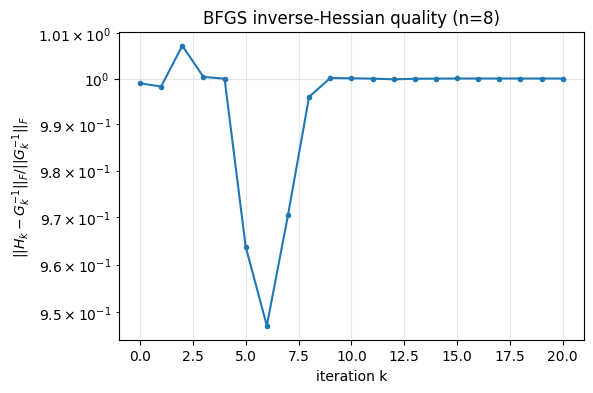

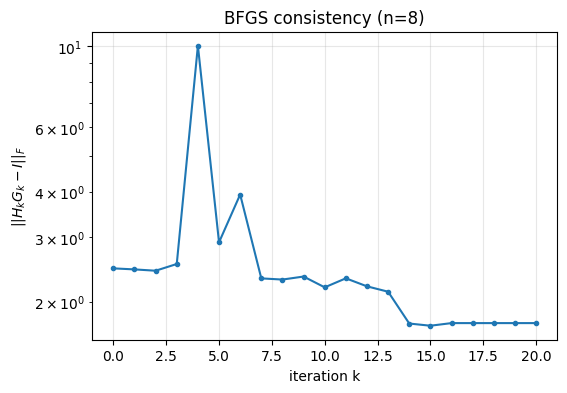

In [2]:
import matplotlib.pyplot as plt

errs1 = res["errs_invF"]; errs2 = res["errs_prodI"]

plt.figure(figsize=(6,4))
plt.semilogy(errs1, '-o', ms=3)
plt.xlabel('iteration k'); plt.ylabel(r'$||H_k - G_k^{-1}||_F / ||G_k^{-1}||_F$')
plt.title(f'BFGS inverse-Hessian quality (n={res["n"]})'); plt.grid(True, alpha=0.3)

plt.figure(figsize=(6,4))
plt.semilogy(errs2, '-o', ms=3)
plt.xlabel('iteration k'); plt.ylabel(r'$||H_k G_k - I||_F$')
plt.title(f'BFGS consistency (n={res["n"]})'); plt.grid(True, alpha=0.3)

# Project 2 – Overall Architecture Overview

---

### **1 Problem Layer — Define Optimization Problems**

- **`OptimizationProblem (base.py)`**
  Provides a unified interface for
  \( f(x) \), \( \nabla f(x) \), and optionally \( G(x)=\nabla^2 f(x) \).
  → *Implements Task 1.*

- **Examples**
  - **Rosenbrock function** *(Implementation.ipynb)* → **Task 5 / 7**
  - **Chebyquad adapter** *(chebyquad_adapter.py)* → **Task 10**

  Both return a consistent `OptimizationProblem` object so that **any optimizer** can plug in directly.

---

### **2️ Method Layer — Optimization Algorithms**

- **`Optimizer (base.py)`**
  General solver framework:
  handles `solve(x0)`, iteration logging (`iter_info`), convergence tests, and printing.
  → *Task 2.*

- **`NewtonOptimizer (Optimizers.py)`**
  - Finite-difference & symmetrized Hessian → *Task 3*
  - Line-search strategies:
    • **Exact** (Brent 1-D minimization) → *Task 4 / 5*
    • **Inexact** (Goldstein / Wolfe conditions) → *Task 6 / 7 / 8*

- **`Quasi-Newton Optimizers (QNOptimizers.py)`**
  - **BFGS**, **DFP** (rank-2 updates)
  - **Symmetric Broyden** (SR1)
  - **Good / Bad Broyden** (rank-1 updates) → *Task 9*

All inherit from `Optimizer`, reuse the same line-search interface, and share unified logging via `iter_info`.

---

### **3️ Evaluation Layer — Testing & Benchmarking**

- **`tests/test_rosenbrock.py`** → *Tasks 5 & 8*
  Verifies convergence and plots iteration paths on the Rosenbrock function.

- **`tests/test_chebyquad.py` + `task11_experiment()` (in notebook)** → *Task 11*
  Compares Newton & Quasi-Newton methods vs `scipy.optimize.fmin_bfgs` for n = 4, 8, 11.

- **`tests/benchmark.py`** → *Task 12*
  Evaluates **BFGS inverse-Hessian quality**:
  \[
  \|H_k - G_k^{-1}\|_F / \|G_k^{-1}\|_F, \qquad
  \|H_k G_k - I\|_F
  \]
  Shown as log-scale convergence plots.

---

### **Execution Flow**

1. **Define problem** → Rosenbrock or Chebyquad.
2. **Select optimizer** → Newton or any Quasi-Newton method.
3. **Run** `solve(x0)` → iterative updates + line search + logging.
4. **Evaluate & visualize** results → tables + contour plots + benchmark figures.

---

*All components integrate cleanly through the unified interface in `base.py`.
This modular design makes new problems or algorithms easy to plug in and compare.*